# Week 7 Assignment

This week we are collecting some data from Reddit and doing some basic EDA on it. You should:

- create your Reddit account and API keys
- collect data from a subreddit of your choice
    - at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
- save the data to a SQLite3 database
- perform some basic EDA on the data
    - create at least 2 plots
- write a short analysis at the end describing the process and results
- turn in the Jupyter Notebook and PDF printout or export to the week 7 dropbox

***Optional* advanced section**
- Practice SQL queries and select a subsection of the posts you collected
- Modify your code to collect data beyond the 1000 item limit
- Collect comments from the posts for analysis next week and do some EDA on the comments (e.g. who is the top commenter, which commenters have the most up and down votes or most controversial posts, etc)
- examine n-grams ([bigrams](https://stackoverflow.com/a/37651184/4549682), trigrams) or [collocations](https://www.geeksforgeeks.org/nlp-word-collocations/)

Note: There is no solution file for this week.

In [1]:
#create your Reddit account and API keys
#Done!!
#collect data from a subreddit of your choice
##at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
import praw
import pandas as pd
import credentials #this has been modified to include my info

In [2]:
#collect data from a subreddit of your choice
##at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)
print(credentials.client_id)
print(credentials.client_secret)
print(credentials.user_agent)

bytiyulUjxBeeTbH1UcR4g
IxWBsEZ2a49N2z95654Gl2YAEzlDQg
jbmsds600


In [3]:
#collect data from a subreddit of your choice
##at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
subreddit_01 = list(reddit.subreddit('DunderMifflin').hot(limit=20))
subreddit_01

[Submission(id='n374wo'),
 Submission(id='t1ar7s'),
 Submission(id='t1biz1'),
 Submission(id='t11bh2'),
 Submission(id='t178yy'),
 Submission(id='t17mx3'),
 Submission(id='t1h3xa'),
 Submission(id='t0s7f4'),
 Submission(id='t0qvex'),
 Submission(id='t19awg'),
 Submission(id='t0juql'),
 Submission(id='t0z0is'),
 Submission(id='t1bl2q'),
 Submission(id='t0h6wp'),
 Submission(id='t1jwab'),
 Submission(id='t1fhpq'),
 Submission(id='t1krv4'),
 Submission(id='t1d1bb'),
 Submission(id='t0uyqo'),
 Submission(id='t0u6jj')]

In [4]:
#collect data from a subreddit of your choice
##at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
for post in subreddit_01:
    print(post.title, post.score)

[Reminder] DO NOT buy any products through Reddit comments 1650
Damn Kelly is savage.. 20967
Scott’s Tots IRL 😬 3316
Why did gabe not say she's lying? He just let her have it 9235
A dangerous game of hot and cold. 1339
When Brent Forrester goes on Office Ladies and says the Mafia episode 'is considered a modern comedy classic'.... 403
I love how aggressive Erin is to Kevin and Kevin looks so sad 96
Prince Family Paper is harder to watch than Scott's Tots. This is the hill I will die on 3269
He sings along almost every time it comes on. 3828
r/DunderMiffilin "hot takes" Starter Pack: 169
Is it just me or was this lady a terrible mother? 18499
As well as "Get out Skeleton-man", Pam saying "I think you're a witch" and Nellie replying "I think you're amazing" gets me every time 654
Fun Fact: This is A Word Nerd Joke! Explanation in Comments 82
Michael’s laugh is so pure 😂😂 11181
Channeled my inner Michael Scott 22
Tough pill to swallow. 38
My coworkers hate me thanks to the best rap duo ev

In [5]:
#collect data from a subreddit of your choice
##at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
reddit_data = {'title': [],
               'link': [], 
               'author': [],
               'n_comments': [],
               'score': [],
               'text': []}

subreddit_01_title = 'DunderMifflin'
subreddit_01 = reddit.subreddit(subreddit_01_title).hot(limit=None)

for post in list(subreddit_01):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [6]:
#collect data from a subreddit of your choice
##at a minimum, collect the posts from the subreddit; optionally collect comments on the posts
df_01 = pd.DataFrame(reddit_data)
df_01

,title,link,author,n_comments,score,text
0,[Reminder] DO NOT buy any products through Red...,/r/DunderMifflin/comments/n374wo/reminder_do_n...,lazenbooby,107,1649,This should be completely obvious and common s...
1,Damn Kelly is savage..,/r/DunderMifflin/comments/t1ar7s/damn_kelly_is...,Pristine_Fan2608,135,20960,
2,Scott’s Tots IRL 😬,/r/DunderMifflin/comments/t1biz1/scotts_tots_irl/,PriorChampionship214,87,3317,
3,Why did gabe not say she's lying? He just let ...,/r/DunderMifflin/comments/t11bh2/why_did_gabe_...,KuroCrack,466,9238,
4,A dangerous game of hot and cold.,/r/DunderMifflin/comments/t178yy/a_dangerous_g...,Dupinoje,32,1338,
...,...,...,...,...,...,...
874,Angela vibes,/r/DunderMifflin/comments/su0itv/angela_vibes/,LordFedoraWeed,50,197,
875,The Pam and Toby wedding photos mentioned on t...,/r/DunderMifflin/comments/sty8wy/the_pam_and_t...,Phillies059,15,258,
876,Jenna just posted Jim and Pam’s wedding vows t...,/r/DunderMifflin/comments/suc1w7/jenna_just_po...,JustAsHotAsJan,5,36,
877,I guess Michael forgot to say goodbye to Hank,/r/DunderMifflin/comments/subjad/i_guess_micha...,TStark84,8,39,


In [7]:
#save the data to a SQLite3 database
import sqlite3
con = sqlite3.connect("sql/subreddit_01.sqlite")
df_01.to_sql('posts', con, if_exists='replace', index=False)

879

In [8]:
df_01_check = pd.read_sql_query('SELECT * FROM posts;', con)
con.close()
df_01_check

,title,link,author,n_comments,score,text
0,[Reminder] DO NOT buy any products through Red...,/r/DunderMifflin/comments/n374wo/reminder_do_n...,lazenbooby,107,1649,This should be completely obvious and common s...
1,Damn Kelly is savage..,/r/DunderMifflin/comments/t1ar7s/damn_kelly_is...,Pristine_Fan2608,135,20960,
2,Scott’s Tots IRL 😬,/r/DunderMifflin/comments/t1biz1/scotts_tots_irl/,PriorChampionship214,87,3317,
3,Why did gabe not say she's lying? He just let ...,/r/DunderMifflin/comments/t11bh2/why_did_gabe_...,KuroCrack,466,9238,
4,A dangerous game of hot and cold.,/r/DunderMifflin/comments/t178yy/a_dangerous_g...,Dupinoje,32,1338,
...,...,...,...,...,...,...
874,Angela vibes,/r/DunderMifflin/comments/su0itv/angela_vibes/,LordFedoraWeed,50,197,
875,The Pam and Toby wedding photos mentioned on t...,/r/DunderMifflin/comments/sty8wy/the_pam_and_t...,Phillies059,15,258,
876,Jenna just posted Jim and Pam’s wedding vows t...,/r/DunderMifflin/comments/suc1w7/jenna_just_po...,JustAsHotAsJan,5,36,
877,I guess Michael forgot to say goodbye to Hank,/r/DunderMifflin/comments/subjad/i_guess_micha...,TStark84,8,39,


<AxesSubplot:title={'center':'Scores'}, ylabel='Frequency'>

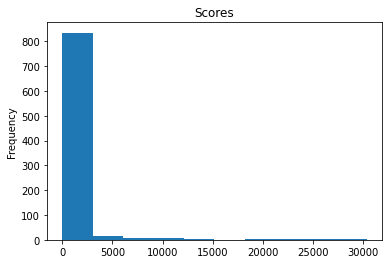

In [9]:
#perform some basic EDA on the data
df_01['score'].plot.hist(bins=10, title='Scores', xlabel='Score')
##create at least 2 plots

<AxesSubplot:>

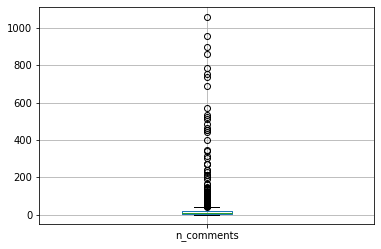

In [10]:
df_01.boxplot('n_comments')

<AxesSubplot:title={'center':'Top Authors'}, ylabel='# Posts'>

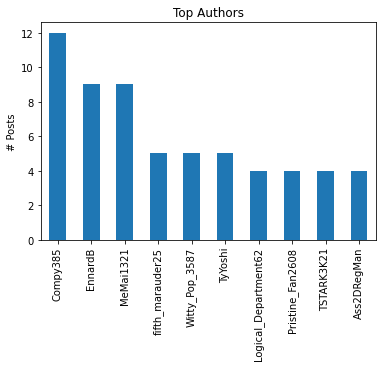

In [11]:
df_01['author'].value_counts()[:10].plot.bar(title='Top Authors', ylabel='# Posts')

In [12]:
df_01[df_01['author'] == 'Compy385']

,title,link,author,n_comments,score,text
70,Trivia S8 E11 - Where Was the Sabre Office Fil...,/r/DunderMifflin/comments/t1ed57/trivia_s8_e11...,Compy385,0,3,Just curious as to the filming location of the...
151,Did DM Make It's Own Brand of Paper Too?,/r/DunderMifflin/comments/t0tddk/did_dm_make_i...,Compy385,6,2,DM obviously resells from other manufacturers ...
247,Anyone Else Wanted to See a Full Scene of Andy...,/r/DunderMifflin/comments/szt7q6/anyone_else_w...,Compy385,9,10,I think it would've been hilarious/awesome all...
313,Gabe's Place Is Awesome,/r/DunderMifflin/comments/szojbx/gabes_place_i...,Compy385,3,1,Just watched Viewing Party (S7 E8). Gabe's pla...
403,Am I the Only One Who Noticed The Sweeney Todd...,/r/DunderMifflin/comments/szi4nk/am_i_the_only...,Compy385,16,0,
455,What Exactly Was Gabe’s Position?,/r/DunderMifflin/comments/sya3sb/what_exactly_...,Compy385,17,5,I’m watching the episodes last the Sabre merge...
527,Imagining - Jim and Pam's Reaction After They ...,/r/DunderMifflin/comments/sxfz8y/imagining_jim...,Compy385,1,9,Just watched The Delivery episode. The scene w...
685,Niagara Falls - Jim Could've Gotten Out of His...,/r/DunderMifflin/comments/swbcgn/niagara_falls...,Compy385,7,2,"(Yes I know to the whole ""It's a comedy, just ..."
686,Crossovers Between P&R and The Office?,/r/DunderMifflin/comments/swg8q8/crossovers_be...,Compy385,5,0,Are there any crossovers between Parks and Rec...
777,"Was the MSPC Buyout the Final ""Nail"" in the Co...",/r/DunderMifflin/comments/svp45g/was_the_mspc_...,Compy385,5,0,To get their clients back and resolve business...


In [13]:
import nltk

fd = nltk.FreqDist(' '.join(df_01['title']).split())
fd.most_common(30)

[('the', 380),
 ('a', 205),
 ('to', 184),
 ('I', 171),
 ('and', 154),
 ('of', 148),
 ('is', 131),
 ('in', 115),
 ('this', 98),
 ('you', 81),
 ('it', 74),
 ('Michael', 73),
 ('The', 72),
 ('on', 71),
 ('was', 69),
 ('for', 69),
 ('my', 62),
 ('that', 57),
 ('have', 55),
 ('with', 48),
 ('be', 47),
 ('like', 44),
 ('Office', 42),
 ('me', 42),
 ('just', 41),
 ('Jim', 41),
 ('do', 40),
 ('your', 40),
 ('at', 39),
 ('would', 38)]

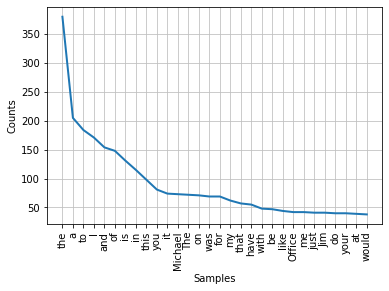

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
fd.plot(30)

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
stops = stopwords.words('english')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
words = ' '.join(df_01['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(30)

[('michael', 76),
 ('office', 72),
 ('like', 46),
 ('jim', 45),
 ('would', 44),
 ('one', 42),
 ('dwight', 36),
 ('episode', 34),
 ('think', 31),
 ('favorite', 30),
 ('andy', 30),
 ('know', 29),
 ('season', 29),
 ('best', 25),
 ('love', 22),
 ('pam', 22),
 ('get', 21),
 ('always', 21),
 ('character', 21),
 ('anyone', 20),
 ('scene', 18),
 ('make', 18),
 ('show', 18),
 ('made', 16),
 ('angela', 16),
 ('never', 15),
 ('really', 15),
 ('-', 15),
 ('good', 15),
 ('got', 15)]

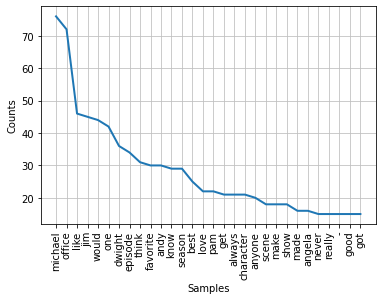

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
cleaned_fd.plot(30)

In [19]:
#### TIME FOR SUBREDDIT #2: worldnews
reddit_data = {'title': [],
               'link': [], 
               'author': [],
               'n_comments': [],
               'score': [],
               'text': []}

subreddit_02_title = 'worldnews'
subreddit_02 = reddit.subreddit(subreddit_02_title).hot(limit=None)

for post in list(subreddit_02):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)
    

In [20]:
df_02 = pd.DataFrame(reddit_data)
df_02

,title,link,author,n_comments,score,text
0,/r/WorldNews Live Thread: Russian Invasion of ...,/r/worldnews/comments/t1n65b/rworldnews_live_t...,Morning-Chub,4018,440,
1,"Kazakhstan, one of Russia's closest allies, de...",/r/worldnews/comments/t1ju3f/kazakhstan_one_of...,manticor225,2575,53384,
2,"U.S. stands ready to evacuate Zelensky, Russia...",/r/worldnews/comments/t1kaom/us_stands_ready_t...,JAnonW,1550,15317,
3,Ukraine has shot down a Russian Ilyushin Il-76...,/r/worldnews/comments/t1l7fa/ukraine_has_shot_...,ArturBravo,934,5982,
4,Anonymous leaks database of the Russian Minist...,/r/worldnews/comments/t1f287/anonymous_leaks_d...,o-Themis-o,5683,132381,
...,...,...,...,...,...,...
830,[Sweden] Nuclear Energy Producer Vattenfall Cu...,/r/worldnews/comments/t0irtv/sweden_nuclear_en...,ta20200123-1,6,700,
831,US to have consultations with India on Ukraini...,/r/worldnews/comments/t0ut5b/us_to_have_consul...,Epynok123,47,125,
832,Ukrainian refugees start arriving in countries...,/r/worldnews/comments/t0q7l5/ukrainian_refugee...,sylvyrfyre,4,241,
833,Large crowd gathers in Sydney to support Ukraine,/r/worldnews/comments/t0t9ca/large_crowd_gathe...,Nusrat124,9,155,


In [21]:
con2 = sqlite3.connect("sql/subreddit_02.sqlite")
df_02.to_sql('posts', con2, if_exists='replace', index=False)

835

In [22]:
df_02_check = pd.read_sql_query('SELECT * FROM posts;', con2)
con2.close()
df_02_check

,title,link,author,n_comments,score,text
0,/r/WorldNews Live Thread: Russian Invasion of ...,/r/worldnews/comments/t1n65b/rworldnews_live_t...,Morning-Chub,4018,440,
1,"Kazakhstan, one of Russia's closest allies, de...",/r/worldnews/comments/t1ju3f/kazakhstan_one_of...,manticor225,2575,53384,
2,"U.S. stands ready to evacuate Zelensky, Russia...",/r/worldnews/comments/t1kaom/us_stands_ready_t...,JAnonW,1550,15317,
3,Ukraine has shot down a Russian Ilyushin Il-76...,/r/worldnews/comments/t1l7fa/ukraine_has_shot_...,ArturBravo,934,5982,
4,Anonymous leaks database of the Russian Minist...,/r/worldnews/comments/t1f287/anonymous_leaks_d...,o-Themis-o,5683,132381,
...,...,...,...,...,...,...
830,[Sweden] Nuclear Energy Producer Vattenfall Cu...,/r/worldnews/comments/t0irtv/sweden_nuclear_en...,ta20200123-1,6,700,
831,US to have consultations with India on Ukraini...,/r/worldnews/comments/t0ut5b/us_to_have_consul...,Epynok123,47,125,
832,Ukrainian refugees start arriving in countries...,/r/worldnews/comments/t0q7l5/ukrainian_refugee...,sylvyrfyre,4,241,
833,Large crowd gathers in Sydney to support Ukraine,/r/worldnews/comments/t0t9ca/large_crowd_gathe...,Nusrat124,9,155,


<AxesSubplot:title={'center':'Scores'}, ylabel='Frequency'>

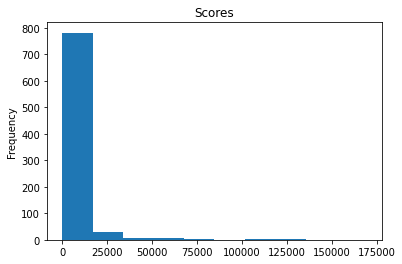

In [23]:
df_02['score'].plot.hist(bins=10, title='Scores', xlabel='Score')

<AxesSubplot:>

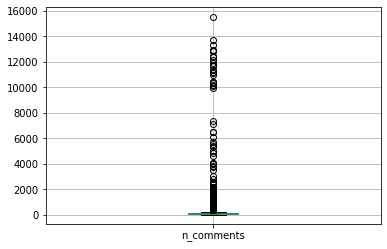

In [24]:
df_02.boxplot('n_comments')

<AxesSubplot:title={'center':'Top Authors'}, ylabel='# Posts'>

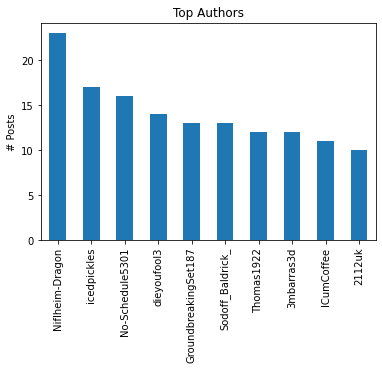

In [25]:
df_02['author'].value_counts()[:10].plot.bar(title='Top Authors', ylabel='# Posts')

In [26]:
df_02[df_02['author'] == 'Niflheim-Dragon']

,title,link,author,n_comments,score,text
64,"Departing from protocol, pope goes to Russian ...",/r/worldnews/comments/t13c03/departing_from_pr...,Niflheim-Dragon,648,11356,
311,Russia says will only talk to Ukraine once Ukr...,/r/worldnews/comments/t11eg4/russia_says_will_...,Niflheim-Dragon,165,867,
354,IOC urges federations to move or cancel events...,/r/worldnews/comments/t19vmz/ioc_urges_federat...,Niflheim-Dragon,8,202,
365,"Erdogan says NATO, Western reaction to Russian...",/r/worldnews/comments/t17hyy/erdogan_says_nato...,Niflheim-Dragon,37,251,
414,"Ukraine central bank bans payments to Russia, ...",/r/worldnews/comments/t0vkug/ukraine_central_b...,Niflheim-Dragon,48,1259,
426,"Almost 11,000 Ukrainians entered Romania on fi...",/r/worldnews/comments/t15bcm/almost_11000_ukra...,Niflheim-Dragon,10,211,
430,Europe ready to impose more sanctions on Russi...,/r/worldnews/comments/t11mc7/europe_ready_to_i...,Niflheim-Dragon,38,369,
460,Activist Thunberg protests against Ukraine inv...,/r/worldnews/comments/t15bye/activist_thunberg...,Niflheim-Dragon,63,168,
553,Turkey cannot stop Russian warships accessing ...,/r/worldnews/comments/t119vr/turkey_cannot_sto...,Niflheim-Dragon,113,192,
562,Cutting Russia off SWIFT technically difficult...,/r/worldnews/comments/t11wdz/cutting_russia_of...,Niflheim-Dragon,98,159,


In [27]:
fd2 = nltk.FreqDist(' '.join(df_02['title']).split())
fd2.most_common(30)

[('to', 399),
 ('Ukraine', 332),
 ('Russian', 252),
 ('of', 225),
 ('Russia', 202),
 ('in', 180),
 ('for', 136),
 ('on', 134),
 ('the', 116),
 ('says', 105),
 ('and', 104),
 ('invasion', 91),
 ('as', 85),
 ('Putin', 83),
 ('with', 75),
 ('Ukrainian', 69),
 ('sanctions', 67),
 ('Kyiv', 63),
 ('from', 59),
 ('-', 56),
 ('NATO', 54),
 ('|', 45),
 ('against', 42),
 ('Invasion', 41),
 ('troops', 41),
 ('after', 41),
 ('will', 39),
 ('a', 38),
 ('EU', 35),
 ('forces', 35)]

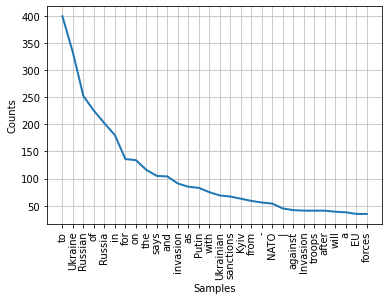

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [28]:
fd2.plot(30)

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
words2 = ' '.join(df_02['title']).lower().split()
cleaned_words2 = [w for w in words2 if w not in set(stops)]
cleaned_fd2 = nltk.FreqDist(cleaned_words2)
cleaned_fd2.most_common(30)

[('ukraine', 332),
 ('russian', 253),
 ('russia', 202),
 ('invasion', 132),
 ('says', 120),
 ('putin', 83),
 ('sanctions', 72),
 ('ukrainian', 69),
 ('kyiv', 63),
 ('nato', 58),
 ('-', 56),
 ('president', 52),
 ('troops', 49),
 ('|', 45),
 ('forces', 37),
 ('minister', 35),
 ('eu', 35),
 ('military', 31),
 ('war', 30),
 ('u.s.', 28),
 ('ukraine,', 28),
 ('attack', 27),
 ('nuclear', 27),
 ("russia's", 26),
 ('china', 26),
 ('amid', 26),
 ('/r/worldnews', 25),
 ('live', 25),
 ('thread:', 25),
 ('us', 25)]

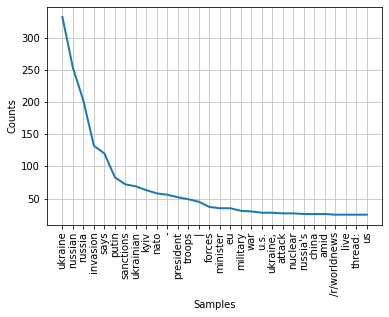

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
cleaned_fd2.plot(30)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Begin program.
Reading credentials...
Credentials
Client ID: bytiyulUjxBeeTbH1UcR4g
Client Secret: IxWBsEZ2a49N2z95654Gl2YAEzlDQg
User Agent: jbmsds600
Building subreddit object
Enter the subreddit to query: dataisbeautiful
                                                 title  \
0    [Topic][Open] Open Discussion Thread — Anybody...   
1    A map of Ukraine's degrading internet infrastr...   
2    [OC] Armed Forces Personnel in the G20 and Ukr...   
3    The US had increased oil imports from Russia 2...   
4    [OC] I made live digit recognizer with machine...   
..                                                 ...   
696  [OC] My 2021 Messenger activity summarized in ...   
697  [OC] Year 2: Every Single Dollar Spent on My F...   
698  [OC] Spend analysis for 2021 for family of 4 i...   
699  [OC] Countries in Europe by GDP (PPP) per capi...   
700  I scored my happyness every day for almost a y...   

                                                  link              author  \
0

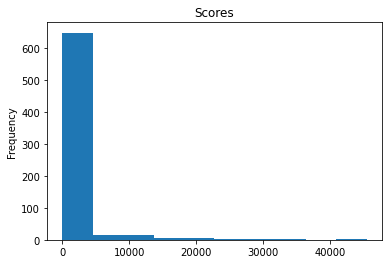

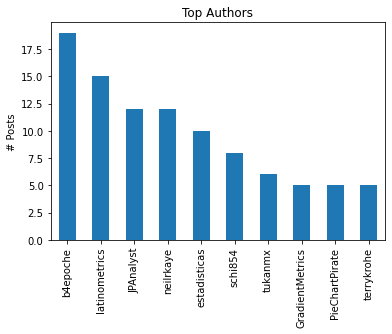

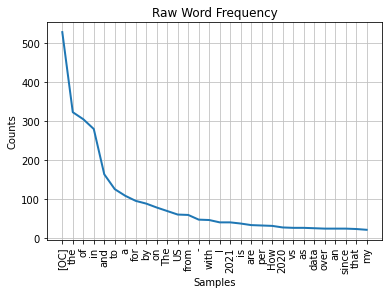

Plotting chart 4


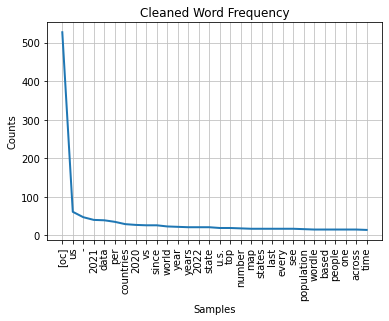

<Figure size 432x288 with 0 Axes>

In [32]:
%run -i "yerPyRed_jupyter.py"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Begin program.
Reading credentials...
Credentials
Client ID: bytiyulUjxBeeTbH1UcR4g
Client Secret: IxWBsEZ2a49N2z95654Gl2YAEzlDQg
User Agent: jbmsds600
Building subreddit object
Enter the subreddit to query: johnmulaney
                                                 title  \
0    John Mulaney Tickets & Merch - Buying & Sellin...   
1                           from scratch tour attire??   
2    "From Scratch" age appropriateness (no spoiler...   
3    John has been studying hard for his comedy exa...   
4                         Read-Thru with John Mulaney!   
..                                                 ...   
928       Find John Mulaney Dad's Negation Skills Clip   
929                   Baby John Mulaney - is that you?   
930                           HE LOOKED LIKE HITLER!!!   
931                       What’s the rush for touring?   
932  Does anyone have the clip of John talking abou...   

                                                  link            author  \
0    /r

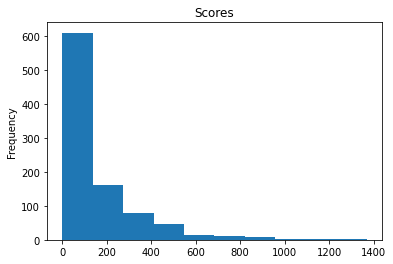

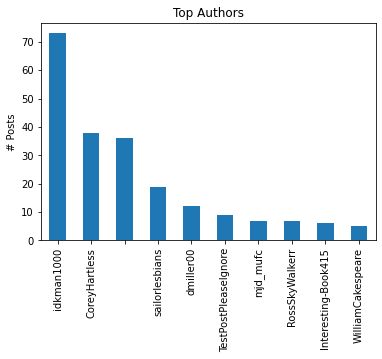

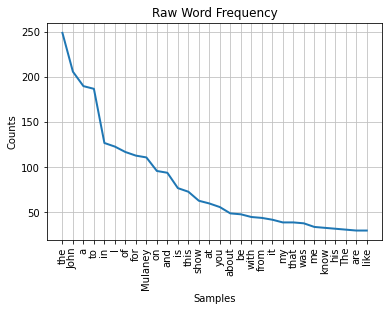

Plotting chart 4


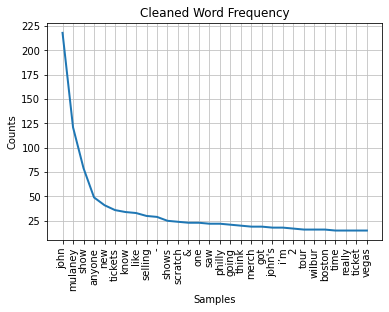

<Figure size 432x288 with 0 Axes>

In [33]:
%run -i "yerPyRed_jupyter.py"

# Analysis